<h3>Подключаем библиотеки и датасеты</h3>

In [272]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

<h3>Выводим ключи у датасета load_diabetes</h3>

In [273]:
diabetes = load_diabetes()
print("Ключи diabetes(): \n{}".format(diabetes.keys()))

Ключи diabetes(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


<h3>Выводим форму датасета load_diabetes</h3>

In [274]:
print("Форма массива data для набора данных diabetes: {}".format(diabetes.data.shape))

Форма массива data для набора данных diabetes: (442, 10)


<h3>Выводим имена признаков у датасета load_diabetes</h3>

In [275]:
print("Имена признаков: \n{}".format(diabetes.feature_names))

Имена признаков: 
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<h3>Подготавливаем  датасет load_diabetes к обучающим моделям</h3>

In [276]:
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<h3>Используем регрессию k ближайших соседей к датасету load_diabetes</h3>

In [277]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

<h3>Выводим график датасета load_diabetes использованной регрессией K ближайших соседей</h3>

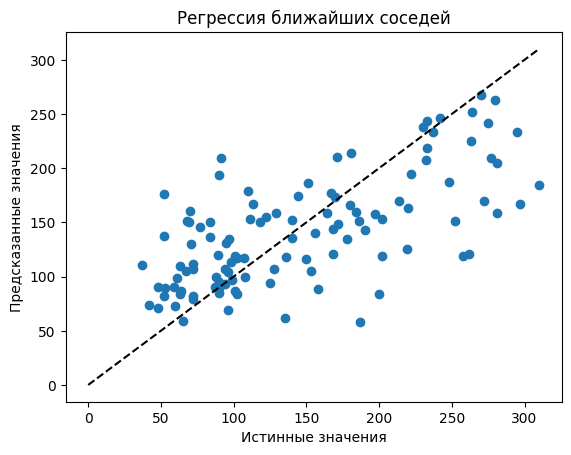

In [278]:
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], '--k')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Регрессия ближайших соседей")
plt.show()

<h3>Линейная регрессия к датасету load_diabetes</h3>

In [279]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


LinearRegression()

<h3>Атрибуты линейной регрессии </h3>

In [280]:
print("lr.coef_: {}".format(linear_regressor.coef_))
print("lr.interecept_: {}".format(linear_regressor.intercept_))

lr.coef_: [  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
lr.interecept_: 151.6651755919933


<h3>Смотрим правильность модели на обучающем и тестовом наборах</h3>

In [281]:
print("Правильность на обучающем наборе: {:.2f}".format(linear_regressor.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(linear_regressor.score(X_test, y_test)))

Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.48


<h3>Используем гребневую регрессию на датасет load_diabetes и смотрим правильность модели на обучающем и тестовом наборах</h3>

In [282]:
ridge = Ridge().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.43
Правильность на тестовом наборе: 0.44


<h3>Смотрим правильность модели на обучающем и тестовом наборах с alpha=10</h3>

In [283]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.15
Правильность на тестовом наборе: 0.16


<h3>Смотрим правильность модели на обучающем и тестовом наборах с alpha=0.1</h3>

In [284]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.51
Правильность на тестовом наборе: 0.49


<h3>Выводим график гребневой регрессии и линейной</h3>

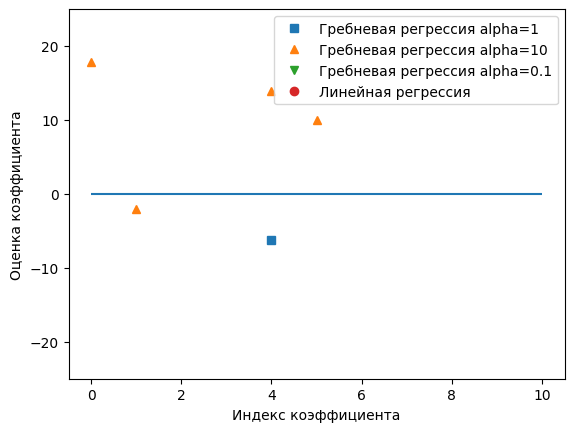

In [285]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(linear_regressor.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(linear_regressor.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()


<h3>Используем Лассо на датасет load_diabetes и смотрим правильность модели на обучающем и тестовом наборах</h3>

In [286]:
lasso = Lasso().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))


Правильность на обучающем наборе: 0.35
Правильность на контрольном наборе: 0.38
Количество использованных признаков: 3


<h3>Используем Лассо на датасет load_diabetes и смотрим правильность модели на обучающем и тестовом наборах при параметрах alpha=0.01 и max_iter=100000</h3>

In [287]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.52
Правильность на контрольном наборе: 0.49
Количество использованных признаков: 10


<h3>Используем Лассо на датасет load_diabetes и смотрим правильность модели на обучающем и тестовом наборах при параметрах alpha=0.0001 и max_iter=100000</h3>

In [288]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

Правильность на обучающем наборе: 0.52
Правильность на контрольном наборе: 0.48
Количество использованных признаков: 10


<h3>Выводим график лассо и гребневой регрессии</h3>

Text(0, 0.5, 'Оценка коэффициента')

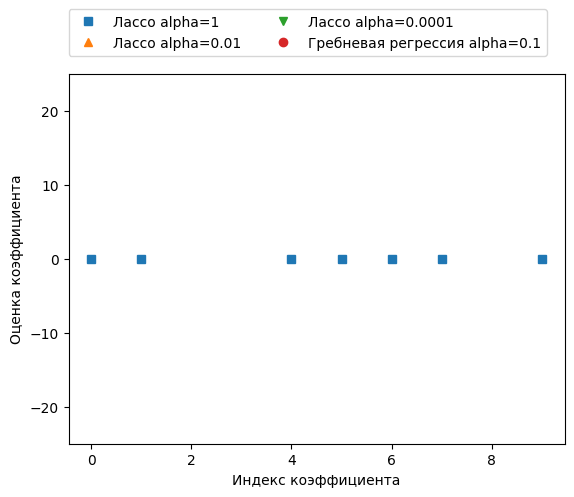

In [289]:
plt.plot(lasso.coef_, "s", label="Лассо alpha=1")
plt.plot(lasso001.coef_, "^", label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

<h3>Используем LogisticRegression на датасет load_diabetes и смотрим правильность модели на обучающем и тестовом наборах</h3>

In [290]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.015
Правильность на тестовом наборе: 0.009


<h3>Используем LogisticRegression на датасет load_diabetes и смотрим правильность модели на обучающем и тестовом наборах при параметрах С=100</h3>

In [291]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.172
Правильность на тестовом наборе: 0.018


<h3>Используем LogisticRegression на датасет load_diabetes и смотрим правильность модели на обучающем и тестовом наборах при параметрах С=0.01</h3>

In [292]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.015
Правильность на тестовом наборе: 0.009


<h3>Выводим график LogisticRegression</h3>

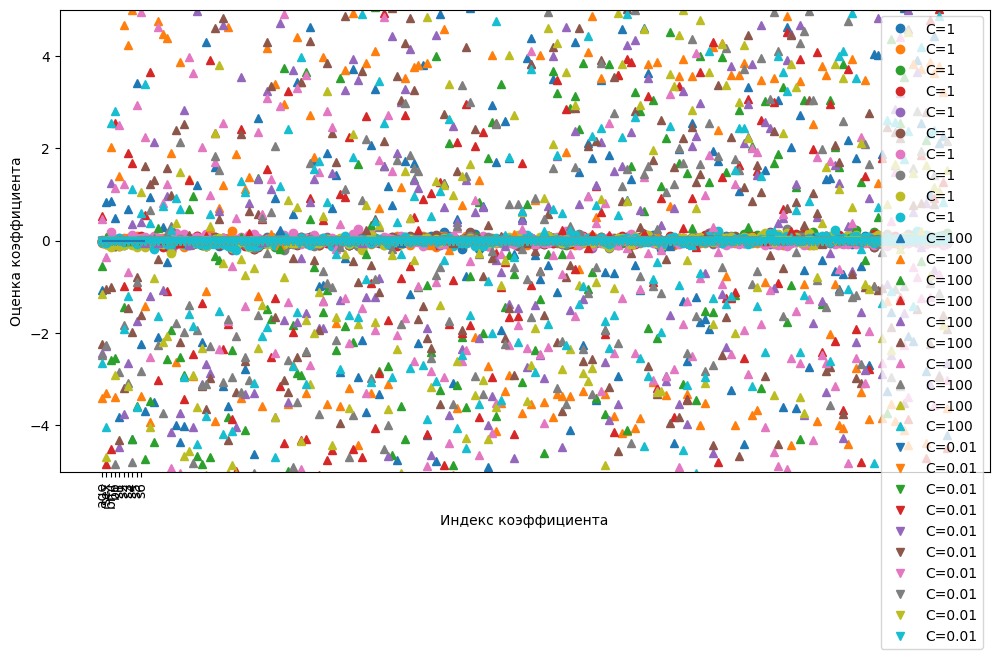

In [293]:
plt.figure(figsize=(12, 6))
plt.plot(logreg.coef_, "o", label="C=1")
plt.plot(logreg100.coef_, "^", label="C=100")
plt.plot(logreg001.coef_, "v", label="C=0.01")
plt.xticks(range(diabetes.data.shape[1]), diabetes.feature_names, rotation=90)
plt.hlines(0,0, diabetes.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

In [294]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()


In [295]:
print("Ключи linnerud(): \n{}".format(linnerud.keys()))

Ключи linnerud(): 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [296]:
print("Форма массива data для набора данных diabetes: {}".format(linnerud.data.shape))

Форма массива data для набора данных diabetes: (20, 3)


In [297]:
# print("Количество примеров для каждого класса:\n {}".format({n: v for n, v in zip(linnerud.target_names, np.bincount(linnerud.target))}))

In [298]:
print("Имена признаков: \n{}".format(linnerud.feature_names))

Имена признаков: 
['Chins', 'Situps', 'Jumps']


In [299]:
X, y = linnerud.data, linnerud.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [300]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

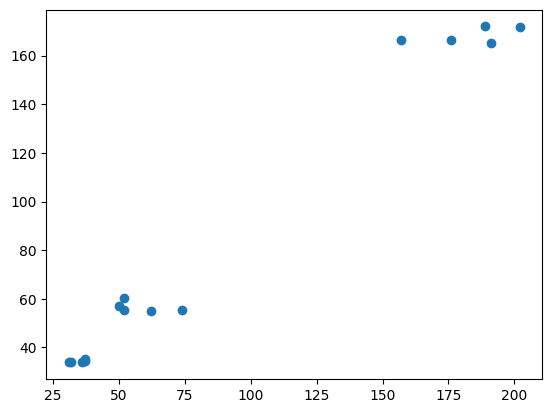

In [301]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Регрессия ближайших соседей")
plt.show()

In [302]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


LinearRegression()

In [303]:
print("lr.coef_: {}".format(linear_regressor.coef_))
print("lr.interecept_: {}".format(linear_regressor.intercept_))

lr.coef_: [[ 0.32807529 -0.38071265  0.16110194]
 [-0.07715719 -0.04797602  0.02737095]
 [-0.56327423  0.05223341 -0.00394451]]
lr.interecept_: [213.48594138  40.89231229  54.18819057]


In [304]:
print("Правильность на обучающем наборе: {:.2f}".format(linear_regressor.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(linear_regressor.score(X_test, y_test)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.69


In [305]:
ridge = Ridge().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.69


In [306]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.68


In [307]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.69


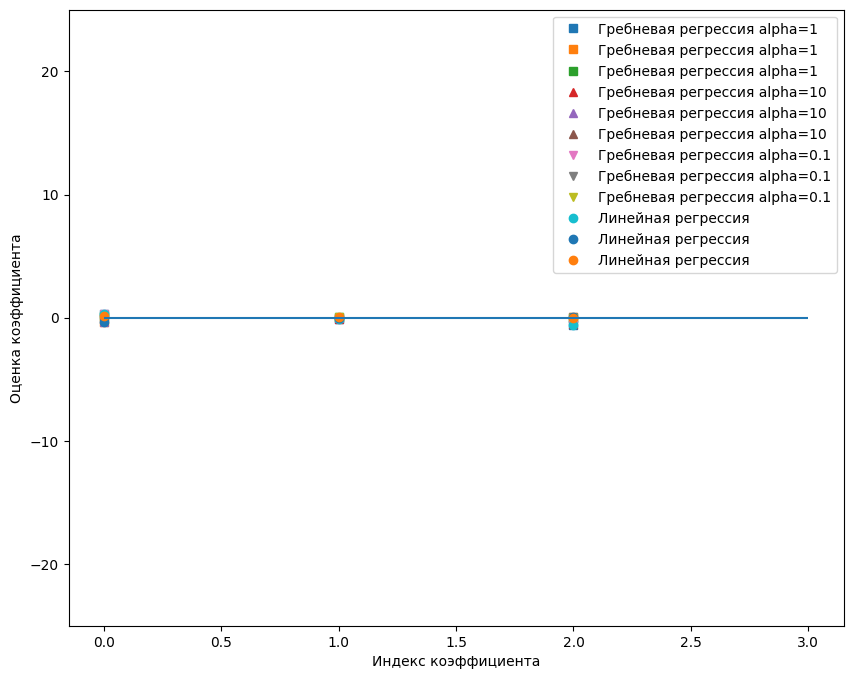

In [308]:
plt.figure(figsize=(10, 8))
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(linear_regressor.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(linear_regressor.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()


In [309]:
lasso = Lasso().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.35
Правильность на контрольном наборе: -0.69
Количество использованных признаков: 9


In [310]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.35
Правильность на контрольном наборе: -0.69
Количество использованных признаков: 9


In [311]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

Правильность на обучающем наборе: 0.35
Правильность на контрольном наборе: -0.69
Количество использованных признаков: 9


Text(0, 0.5, 'Оценка коэффициента')

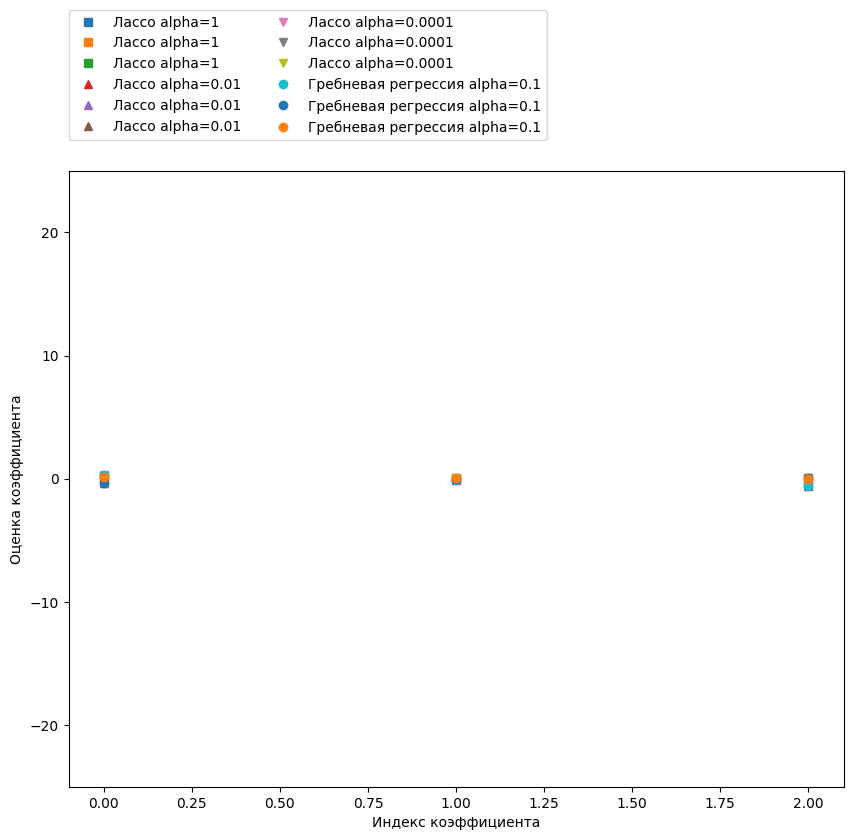

In [312]:
plt.figure(figsize=(10, 8))
plt.plot(lasso.coef_, "s", label="Лассо alpha=1")
plt.plot(lasso001.coef_, "^", label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

In [314]:
# logreg = LogisticRegression().fit(X_train, y_train)

# print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
# print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

In [315]:
# logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
# print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
# print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

In [316]:
# logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
# print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
# print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

In [317]:
plt.figure(figsize=(12, 6))
plt.plot(regr.coef_, "o", label="C=1")
# plt.plot(logreg100.coef_, "^", label="C=100")
# plt.plot(logreg001.coef_, "v", label="C=0.01")
plt.xticks(range(linnerud.data.shape[1]), linnerud.feature_names, rotation=90)
plt.hlines(0,0, linnerud.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

<Figure size 1200x600 with 0 Axes>

Выводы: для первого набора данных лучше всего использовать Лассо при параметрах alpha=0.01 и max_iter=100000. Оно показало значения 0.52 и 0.49. А другие хуже но не намного. Но хуже всех показало LogisticRegression. Результаты были  0.172 и 0.018 или же 0.015 и 0.009. У второй набора данных лучше всего показало Лассо и Линейная регрессия. Результат у них такой 0.35 и -0.69. Хотя эти модели не так хорошо подходят для этого набора данных, так как показатели имеют отрицательные значения. Так же второй набор данных не подходит к LogisticRegression. Потому что он принимает одномерный массив, а у этого набора двухмерный массив с формой (15,3).